In [1]:
import numpy as np
import pandas as pd
import os
import glob
from scipy import sparse
import collections

import matplotlib.pyplot as plt
import seaborn as sns
from dredFISH.Utils import __init__plots

In [2]:
pth = '/bigstore/binfo/mouse/Brain/FISH/MERFISH_Fang2022_Science_CTX'
# !ls $pth
files = np.sort(glob.glob("mouse*", dir_fd=pth))
files

array(['mouse1.AUD_TEA_VIS.242.unexpand.barcodes.csv.gz',
       'mouse1.AUD_TEA_VIS.242.unexpand.features.csv',
       'mouse1.AUD_TEA_VIS.242.unexpand.genes.csv',
       'mouse1.AUD_TEA_VIS.242.unexpand.matrix.csv',
       'mouse2.AUD_TEA_VIS.242.unexpand.barcodes.csv.gz',
       'mouse2.AUD_TEA_VIS.242.unexpand.features.csv',
       'mouse2.AUD_TEA_VIS.242.unexpand.genes.csv',
       'mouse2.AUD_TEA_VIS.242.unexpand.matrix.csv'], dtype='<U47')

In [3]:
%%time
f = os.path.join(pth, "mouse1.AUD_TEA_VIS.242.unexpand.features.csv")
meta = pd.read_csv(f)
f = os.path.join(pth, "mouse1.AUD_TEA_VIS.242.unexpand.genes.csv")
genes = pd.read_csv(f)
f = os.path.join(pth, "mouse1.AUD_TEA_VIS.242.unexpand.matrix.csv")
mtx = pd.read_csv(f)
# f = os.path.join(pth, "mouse1.AUD_TEA_VIS.242.unexpand.barcodes.csv.gz")
# spots = pd.read_csv(f)
meta

CPU times: user 156 ms, sys: 401 ms, total: 556 ms
Wall time: 561 ms


name     global.x     global.y   adjusted.x   adjusted.y  \
0       fov_201_feature_1 -3408.476396  1289.825315 -3408.476396  1289.825315   
1       fov_202_feature_1 -3454.789690  1092.856622 -3454.789690  1092.856622   
2      fov_202_feature_11 -3441.307424  1128.932078 -3441.307424  1128.932078   
3      fov_202_feature_12 -3455.460129  1130.627496 -3455.460129  1130.627496   
4      fov_202_feature_14 -3419.537992  1144.648035 -3419.537992  1144.648035   
...                   ...          ...          ...          ...          ...   
13217  fov_401_feature_73 -1339.942915  2556.751841 -1339.942915  2556.751841   
13218   fov_401_feature_8 -1298.422691  2507.721424 -1298.422691  2507.721424   
13219  fov_401_feature_85 -1401.446263  2640.863239 -1401.446263  2640.863239   
13220   fov_401_feature_9 -1271.547703  2510.911698 -1271.547703  2510.911698   
13221  fov_402_feature_28 -1405.109240  2751.135878 -1405.109240  2751.135878   

             fov.x        fov.y cluster_L1 cluster_L2  cluster_L3  
0      1922.413292   164.049783        EXC   eL2/3.IT  eL2/3.IT.1  
1      1497.520686   191.859933        EXC   eL2/3.IT  eL2/3.IT.1  
2      1621.211194   522.827421        EXC   eL2/3.IT  eL2/3.IT.1  
3      1491.369865   538.381719        EXC   eL2/3.IT  eL2/3.IT.1  
4      1820.930753   667.010518        EXC   eL2/3.IT  eL2/3.IT.1  
...            ...          ...        ...        ...         ...  
13217   716.298435   778.054607       lOGC       lOGC        lOGC  
13218  1097.217925   328.234267       lASC       lASC        lASC  
13219   152.047537  1549.718805       lOGC       lOGC        lOGC  
13220  1343.777445   357.502832       lMGC       lASC        lASC  
13221   118.442239   726.532007       lOGC       lOGC        lOGC  

[13222 rows x 10 columns]

In [4]:
counts = sparse.coo_matrix((mtx['val'].values, (mtx['row'].values-1, mtx['col'].values-1)), shape=(len(genes), len(meta)))
# m, n = counts.shape
# print(counts.nnz/(m*n))
counts = np.asarray(counts.todense())
counts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<AxesSubplot:xlabel='global.x', ylabel='global.y'>

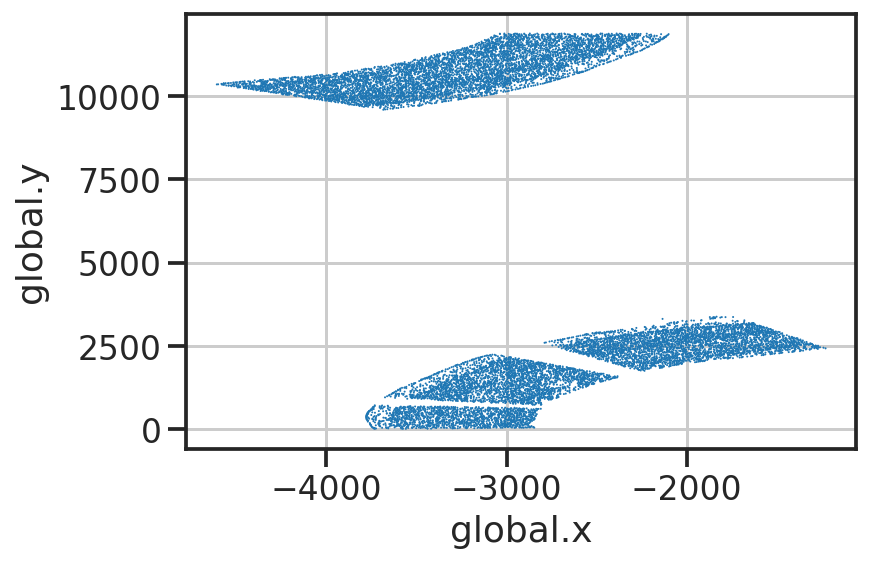

In [5]:
sns.scatterplot(data=meta, x='global.x', y='global.y', s=1, edgecolor='none')

In [6]:
metasub = meta[meta['global.y'] > 9000].copy()
metasub['cluster_L0'] = metasub['cluster_L1'].apply(lambda x: x if x in ['EXC', 'INC'] else "NonNeuronal")
metasub

name     global.x      global.y   adjusted.x    adjusted.y  \
3956   fov_0_feature_10 -2350.964961  11643.875760 -2350.964961  11643.875760   
3957   fov_0_feature_26 -2371.821779  11568.357061 -2371.821779  11568.357061   
3958   fov_0_feature_32 -2343.504670  11596.828818 -2343.504670  11596.828818   
3959   fov_0_feature_33 -2335.780869  11610.272280 -2335.780869  11610.272280   
3960   fov_0_feature_38 -2366.001665  11651.139310 -2366.001665  11651.139310   
...                 ...          ...           ...          ...           ...   
12165  fov_9_feature_19 -2439.274456  11560.295417 -2439.274456  11560.295417   
12166  fov_9_feature_29 -2529.258073  11599.357251 -2529.258073  11599.357251   
12167  fov_9_feature_40 -2497.663338  11658.522847 -2497.663338  11658.522847   
12168  fov_9_feature_53 -2499.604328  11543.678261 -2499.604328  11543.678261   
12169  fov_9_feature_80 -2432.089660  11646.915520 -2432.089660  11646.915520   

             fov.x        fov.y cluster_L1 cluster_L2  cluster_L3   cluster_L0  
3956    362.253157  1618.024300        EXC   eL2/3.IT  eL2/3.IT.1          EXC  
3957    170.906205   925.192203        EXC   eL2/3.IT  eL2/3.IT.1          EXC  
3958    430.696199  1186.400977        EXC   eL2/3.IT  eL2/3.IT.1          EXC  
3959    501.556759  1309.735490        EXC   eL2/3.IT  eL2/3.IT.1          EXC  
3960    224.301751  1684.662374        EXC   eL2/3.IT  eL2/3.IT.4          EXC  
...            ...          ...        ...        ...         ...          ...  
12165  1386.936689   851.232167       lASC       lASC        lASC  NonNeuronal  
12166   561.398925  1209.597614     oMURAL     oMURAL      oMURAL  NonNeuronal  
12167   851.258874  1752.401243       lASC       lASC        lASC  NonNeuronal  
12168   833.451632   698.781191       lMGC       lMGC        lMGC  NonNeuronal  
12169  1452.852251  1645.912005      oENDO      oENDO       oENDO  NonNeuronal  

[5995 rows x 11 columns]

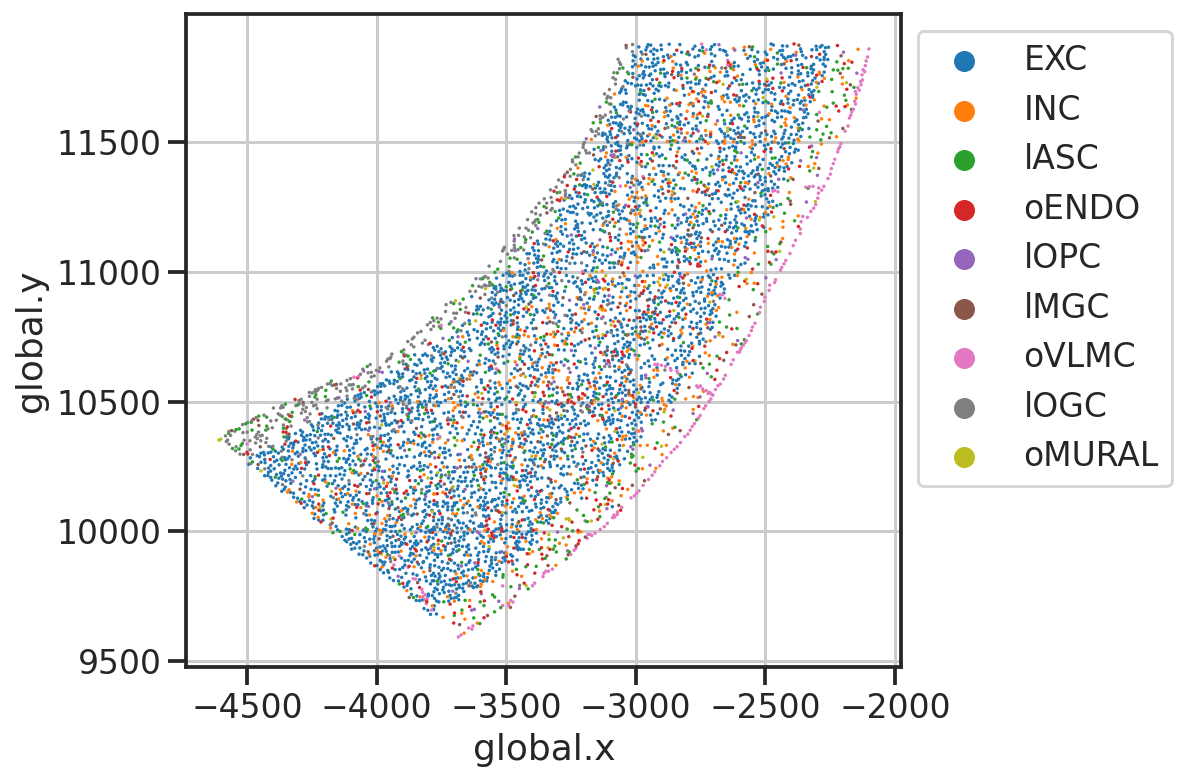

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=metasub, x='global.x', y='global.y', hue='cluster_L1', s=3, edgecolor='none', ax=ax)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1,1))

In [8]:
def rotmat_2d(theta):
    """theta in degree
    """
    t = np.radians(theta)
    mat = np.array([[np.cos(t), -np.sin(t)], 
                    [np.sin(t),  np.cos(t)],
          ])
    return mat
    

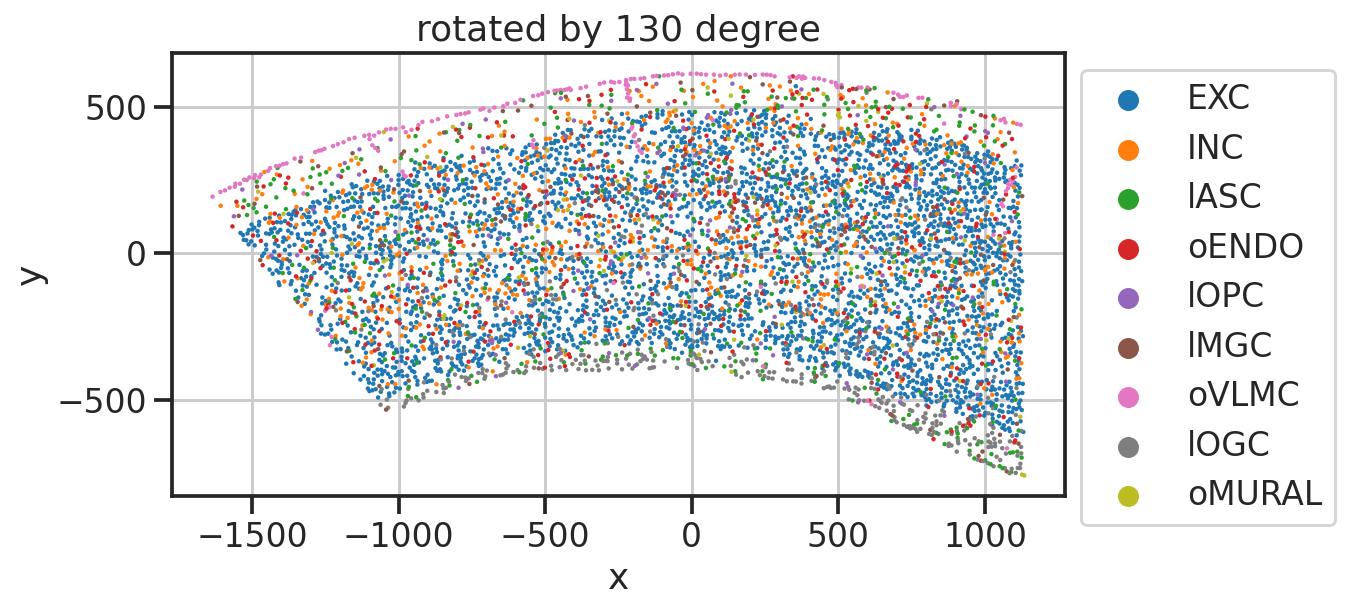

In [9]:
theta_trial = [130] # [110, 120, 130]

for theta in theta_trial:
    XY = metasub[['global.x', 'global.y']].values
    XY_r = XY - XY.mean(axis=0).reshape(1,-1)
    XY_r = XY_r.dot(rotmat_2d(theta).T)
    metasub[['x', 'y']] = XY_r

    fig, ax = plt.subplots(figsize=(8,6))
    sns.scatterplot(data=metasub, x='x', y='y', hue='cluster_L1', s=5, edgecolor='none', ax=ax)
    ax.set_aspect('equal')
    ax.set_title(f'rotated by {theta} degree')
    ax.legend(bbox_to_anchor=(1,1))

In [10]:
metasubsub = metasub[metasub['cluster_L1'] == "EXC"].copy()

In [11]:
exc_clsts = np.unique(metasubsub['cluster_L2'])
exc_clsts

array(['eL2/3.IT', 'eL4/5.IT', 'eL5.ET', 'eL5.IT', 'eL6.CAR3', 'eL6.CT',
       'eL6.IT', 'eL6b', 'eNP'], dtype=object)

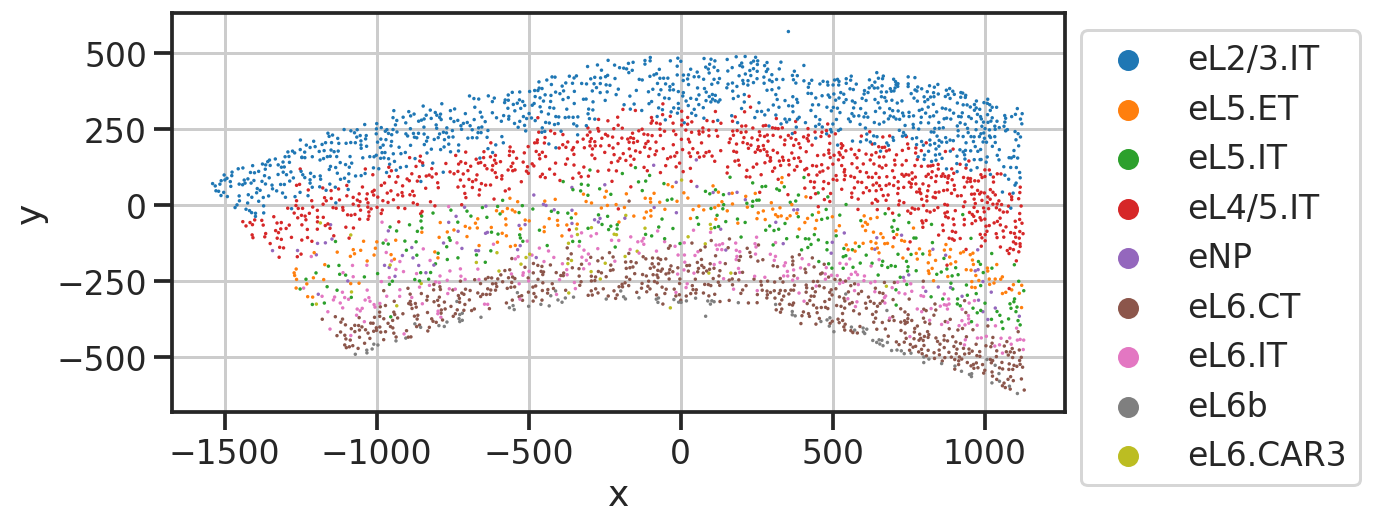

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=metasubsub, x='x', y='y', hue='cluster_L2', s=3, edgecolor='none', ax=ax)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1,1))

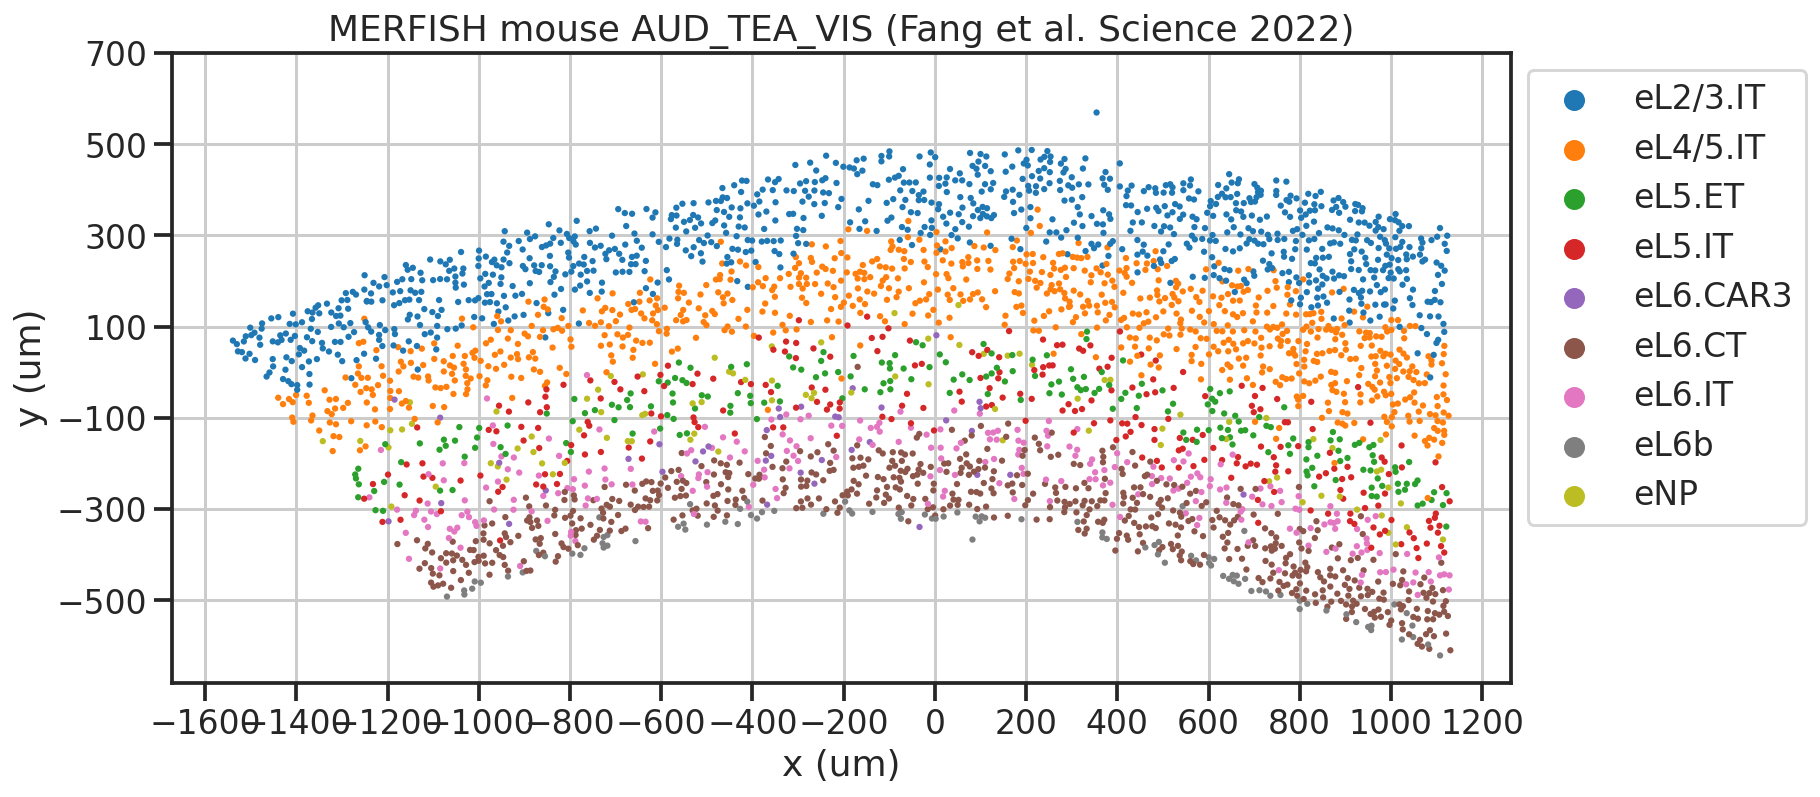

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=metasubsub, x='x', y='y', hue='cluster_L2', hue_order=exc_clsts, s=10, edgecolor='none', ax=ax)
ax.set_aspect('equal')
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title(f'MERFISH mouse AUD_TEA_VIS (Fang et al. Science 2022)')
ax.set_xticks(np.arange(-1600, 1300, 200))
ax.set_yticks(np.arange(-500, 701, 200))
ax.legend(bbox_to_anchor=(1,1))

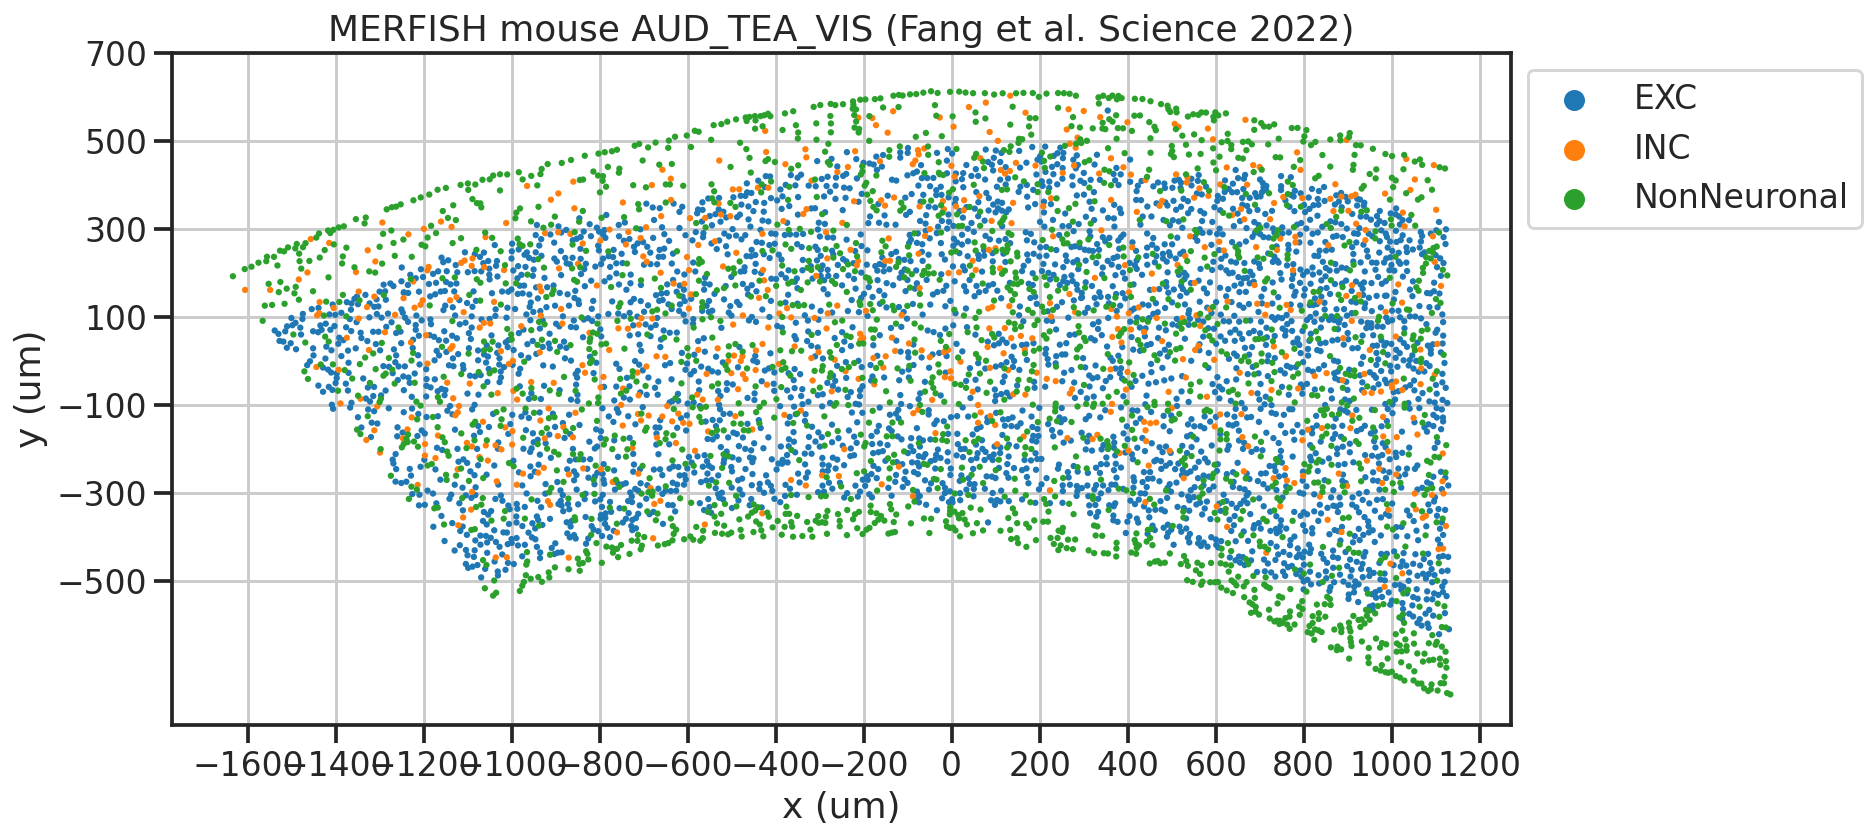

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=metasub, x='x', y='y', hue='cluster_L0', 
                # hue_order=exc_clsts, 
                s=10, edgecolor='none', ax=ax)
ax.set_aspect('equal')
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title(f'MERFISH mouse AUD_TEA_VIS (Fang et al. Science 2022)')
ax.set_xticks(np.arange(-1600, 1300, 200))
ax.set_yticks(np.arange(-500, 701, 200))
ax.legend(bbox_to_anchor=(1,1))

In [15]:
metasub['cluster_hybrid'] = np.where(
    [x in exc_clsts for x in metasub['cluster_L2'].values], 
    metasub['cluster_L2'], 
    metasub['cluster_L0'])

In [16]:
metasub['cluster_L0'].unique()
metasub['cluster_hybrid'].unique()

array(['eL2/3.IT', 'eL5.ET', 'eL5.IT', 'eL4/5.IT', 'eNP', 'eL6.CT',
       'eL6.IT', 'eL6b', 'eL6.CAR3', 'INC', 'NonNeuronal'], dtype=object)

In [17]:
# colors = sns.color_palette('tab10', 9)
# palette = {}
# for clst, color in zip(np.unique(metasub['cluster_l2']), colors):
#     palette[clst] = color
# palette

colors = sns.color_palette('Paired', len(exc_clsts))
palette = collections.OrderedDict()
for clst, color in zip(exc_clsts, colors):
    palette[clst] = color
palette['INC'] = 'gray'
palette['NonNeuronal'] = 'lightgray'
hybrid_clsts = np.asarray(list(palette.keys()))
palette

OrderedDict([('eL2/3.IT',
              (0.6509803921568628, 0.807843137254902, 0.8901960784313725)),
             ('eL4/5.IT',
              (0.12156862745098039, 0.47058823529411764, 0.7058823529411765)),
             ('eL5.ET',
              (0.6980392156862745, 0.8745098039215686, 0.5411764705882353)),
             ('eL5.IT', (0.2, 0.6274509803921569, 0.17254901960784313)),
             ('eL6.CAR3', (0.984313725490196, 0.6039215686274509, 0.6)),
             ('eL6.CT',
              (0.8901960784313725, 0.10196078431372549, 0.10980392156862745)),
             ('eL6.IT',
              (0.9921568627450981, 0.7490196078431373, 0.43529411764705883)),
             ('eL6b', (1.0, 0.4980392156862745, 0.0)),
             ('eNP',
              (0.792156862745098, 0.6980392156862745, 0.8392156862745098)),
             ('INC', 'gray'),
             ('NonNeuronal', 'lightgray')])

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


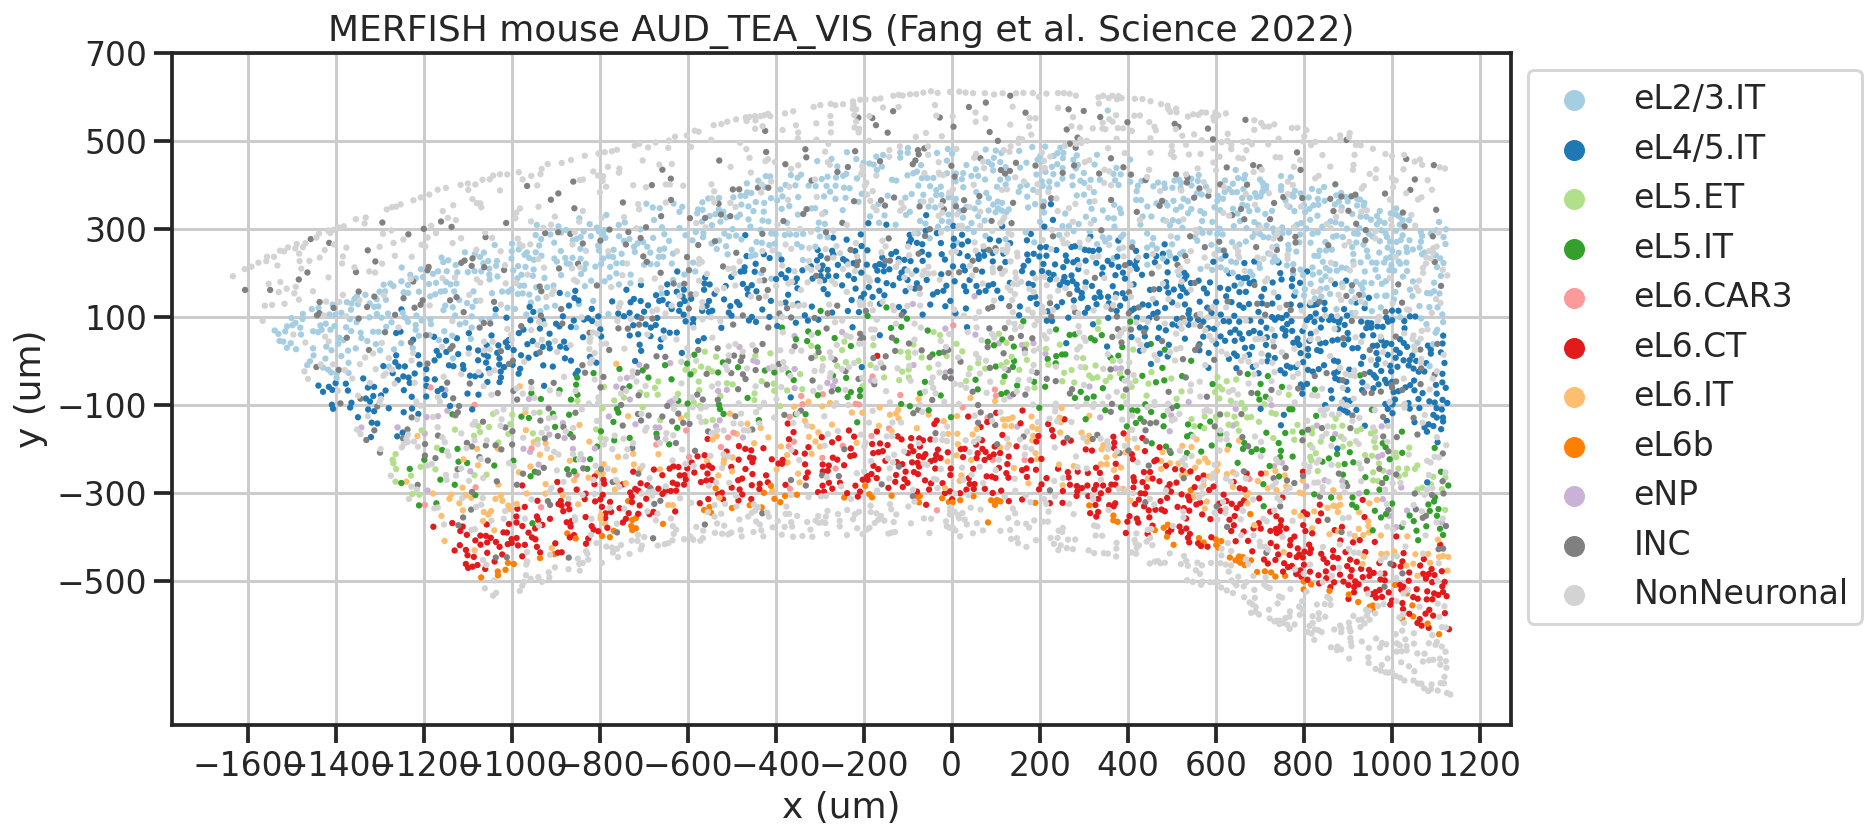

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=metasub, x='x', y='y', hue='cluster_hybrid', 
                hue_order=hybrid_clsts, 
                palette=palette,
                s=10, edgecolor='none', ax=ax)
ax.set_aspect('equal')
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title(f'MERFISH mouse AUD_TEA_VIS (Fang et al. Science 2022)')
ax.set_xticks(np.arange(-1600, 1300, 200))
ax.set_yticks(np.arange(-500, 701, 200))
ax.legend(bbox_to_anchor=(1,1))

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


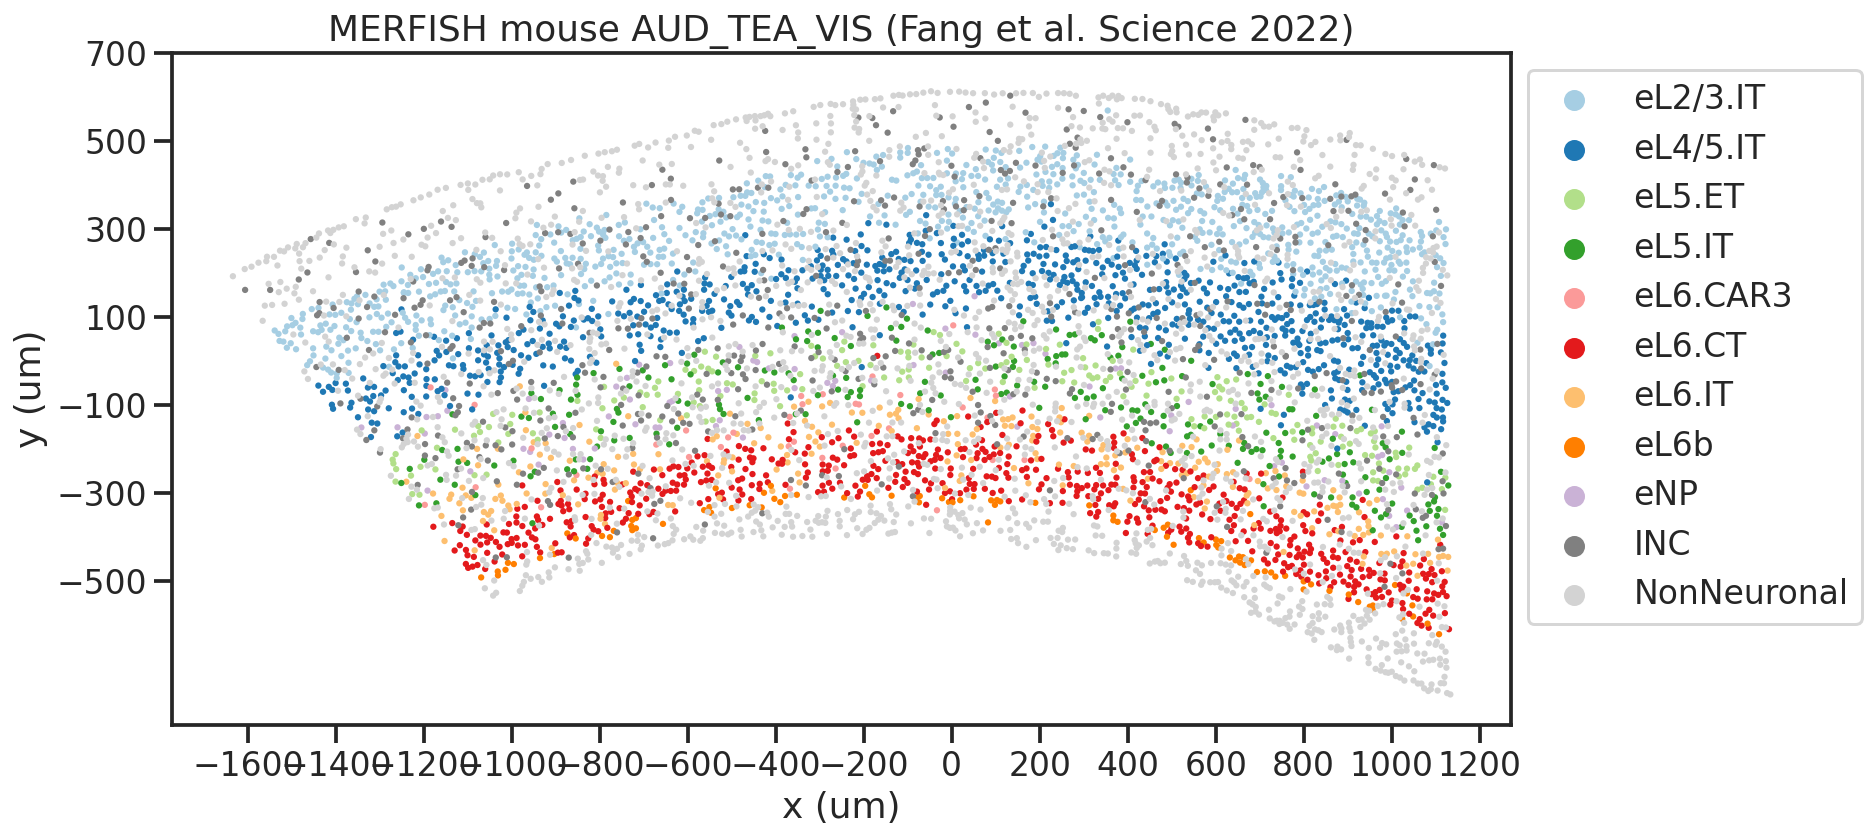

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=metasub, x='x', y='y', hue='cluster_hybrid', 
                hue_order=hybrid_clsts, 
                palette=palette,
                s=10, edgecolor='none', ax=ax)
ax.grid(False)
ax.set_aspect('equal')
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title(f'MERFISH mouse AUD_TEA_VIS (Fang et al. Science 2022)')
ax.set_xticks(np.arange(-1600, 1300, 200))
ax.set_yticks(np.arange(-500, 701, 200))
ax.legend(bbox_to_anchor=(1,1))

In [20]:
from scipy import spatial
XY = metasub[['x', 'y']].values

In [21]:
hull = spatial.ConvexHull(XY)
hull.vertices

array([4505, 4131, 5741, 5353, 5332, 4788, 4796, 4798, 4757, 4759, 4334,
       4323, 4282, 4263, 4273, 5316, 5318, 4528, 4296, 3994, 5025, 5031,
       5033, 5037, 5039, 5062, 4007, 4123,  748, 4516], dtype=int32)

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


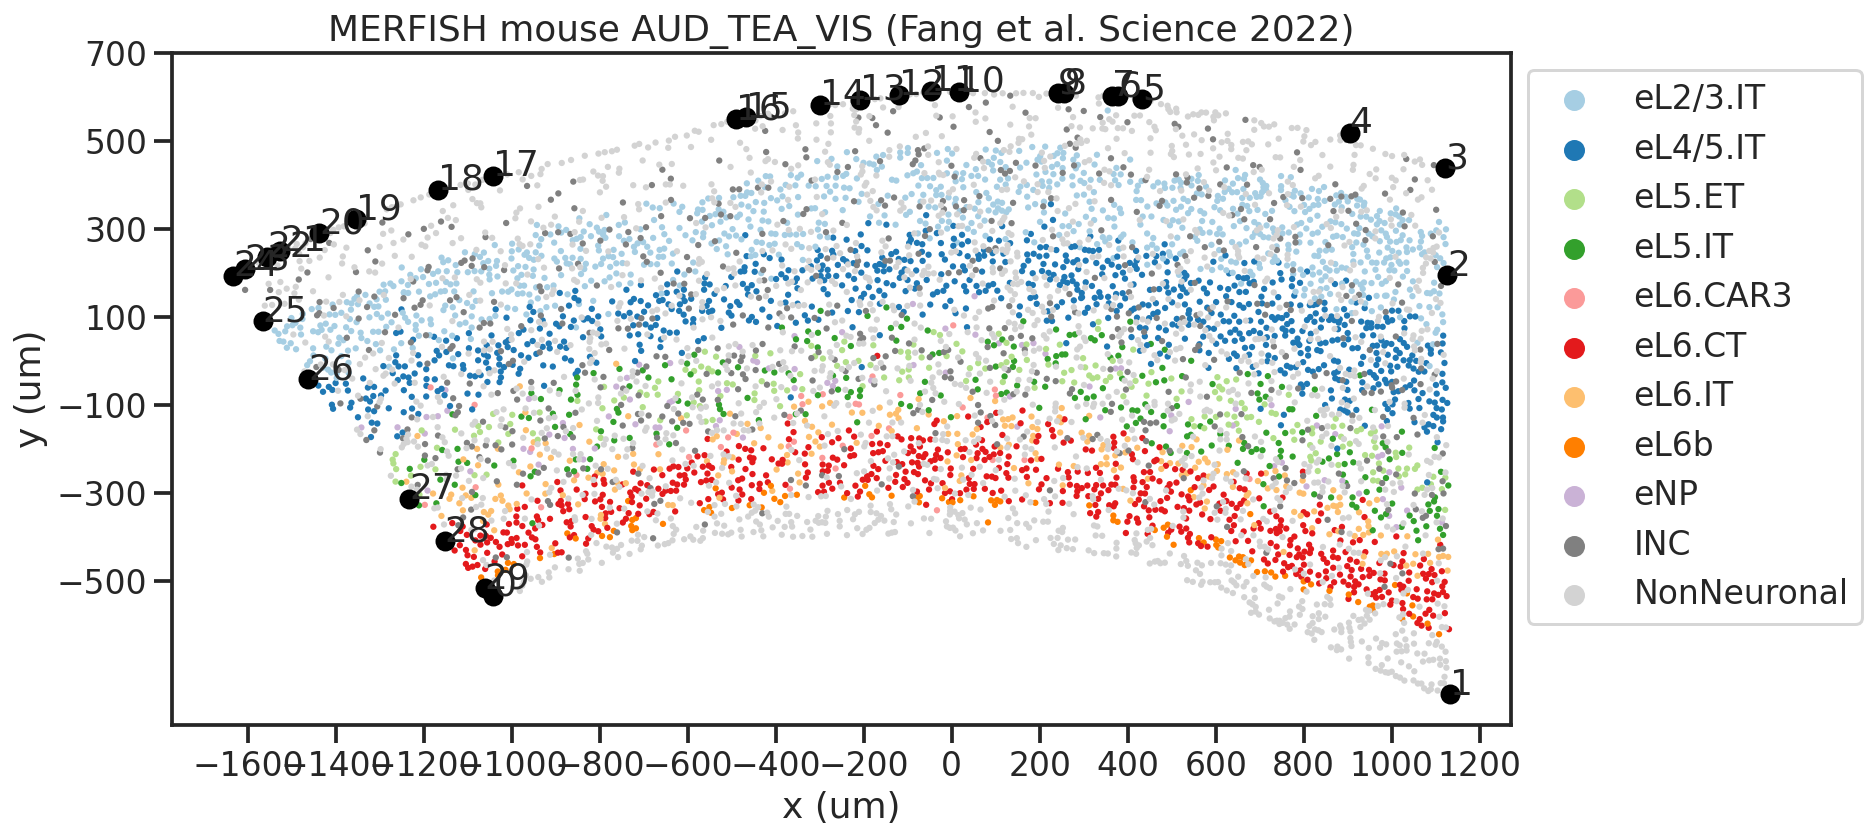

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
for i, vtx in enumerate(hull.vertices):
    ax.plot(XY[vtx, 0], XY[vtx, 1], 'ok')
    ax.text(XY[vtx, 0], XY[vtx, 1], i)
    
sns.scatterplot(data=metasub, x='x', y='y', hue='cluster_hybrid', 
                hue_order=hybrid_clsts, 
                palette=palette,
                s=10, edgecolor='none', ax=ax)
ax.grid(False)
ax.set_aspect('equal')
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title(f'MERFISH mouse AUD_TEA_VIS (Fang et al. Science 2022)')
ax.set_xticks(np.arange(-1600, 1300, 200))
ax.set_yticks(np.arange(-500, 701, 200))
ax.legend(bbox_to_anchor=(1,1))

In [23]:
pia_vtx = hull.vertices[3:25]
pia_curve = XY[pia_vtx]
pia_curve[3:5,0]

array([378.80870189, 365.05997808])

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


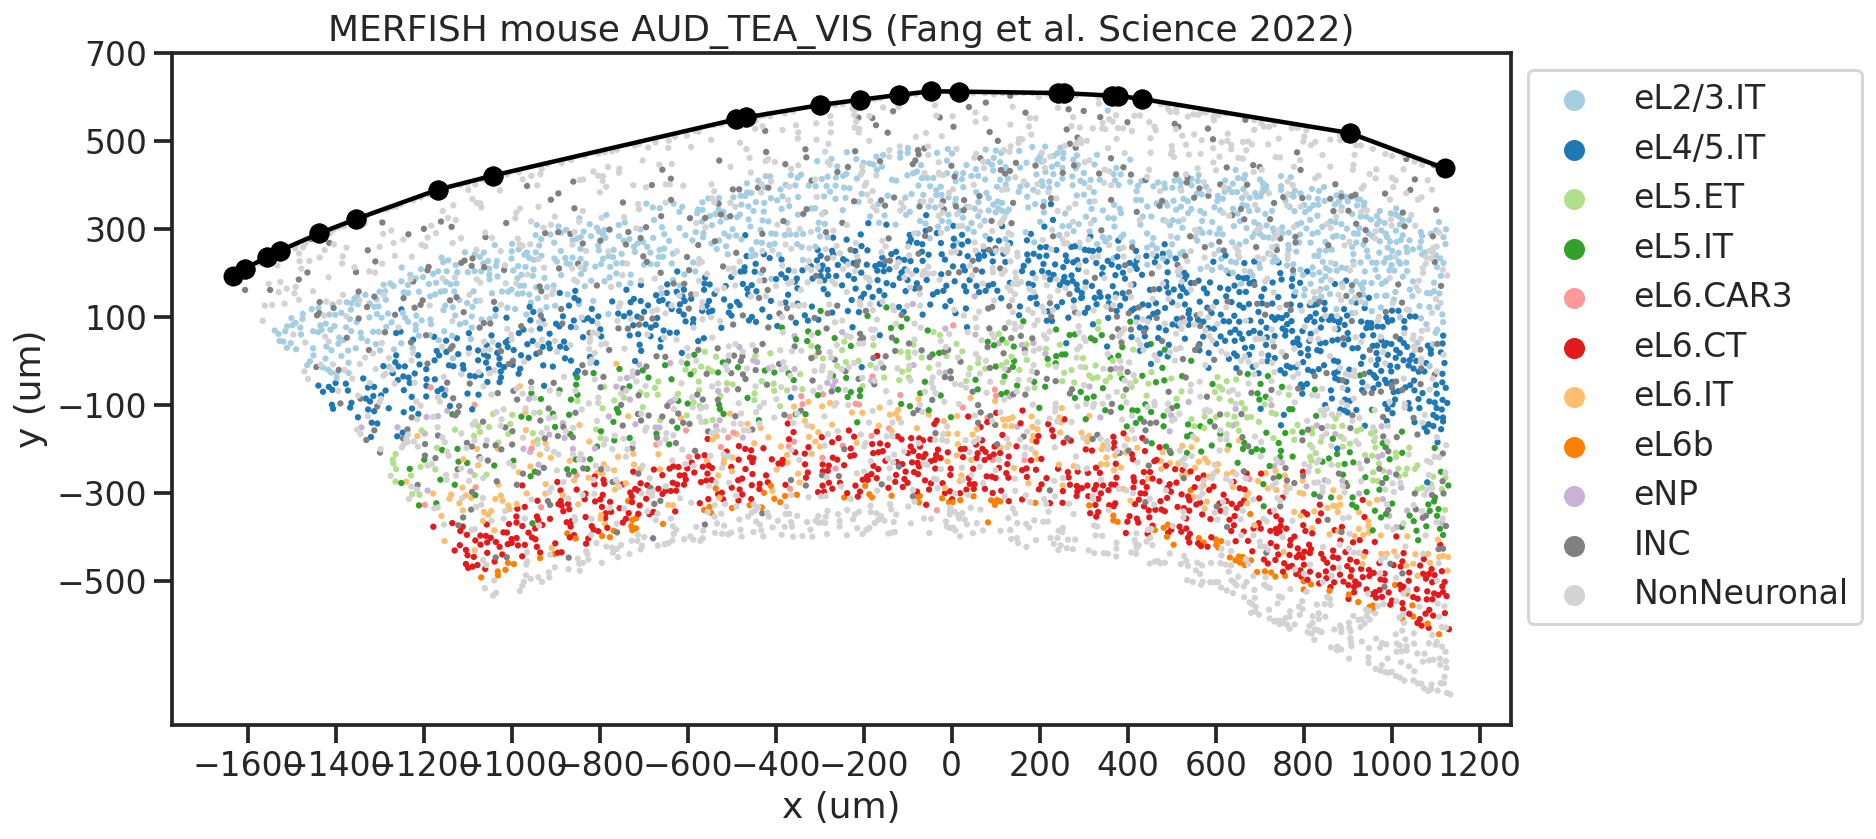

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
for i in range(len(pia_curve)-1):
    ax.plot(pia_curve[i:i+2, 0], 
            pia_curve[i:i+2, 1], 
            '-ok')
    
sns.scatterplot(data=metasub, x='x', y='y', hue='cluster_hybrid', 
                hue_order=hybrid_clsts, 
                palette=palette,
                s=10, edgecolor='none', ax=ax)
ax.grid(False)
ax.set_aspect('equal')
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title(f'MERFISH mouse AUD_TEA_VIS (Fang et al. Science 2022)')
ax.set_xticks(np.arange(-1600, 1300, 200))
ax.set_yticks(np.arange(-500, 701, 200))
ax.legend(bbox_to_anchor=(1,1))

In [25]:
query_point = XY[0]

In [26]:
def p_to_curve(query_point, pia_curve):
    """
    """
    tan_vec = pia_curve[1:] - pia_curve[:-1]
    # unit
    tan_vec = tan_vec/np.linalg.norm(tan_vec, axis=1).reshape(-1,1)
    norm_vec = tan_vec.dot(np.array([[0,-1],[1,0]]).T)
    # np.power(tan_vec[:,0],2)+np.power(tan_vec[:,1],2) # check normed

    query_vec = (query_point - pia_curve[:-1])
    d = np.min(np.abs(query_vec[:,0]*norm_vec[:,0] + query_vec[:,1]*norm_vec[:,1]))
    return d

def ps_to_curve(query_points, pia_curve):
    """
    """
    tan_vec = pia_curve[1:] - pia_curve[:-1]
    # unit
    tan_vec = tan_vec/np.linalg.norm(tan_vec, axis=1).reshape(-1,1)
    norm_vec = tan_vec.dot(np.array([[0,-1],[1,0]]).T)
    
    query_mtx = np.repeat(XY[:,np.newaxis,:], len(pia_curve)-1, axis=1) - pia_curve[:-1]
    ds = np.min(np.abs(query_mtx[:,:,0]*norm_vec[:,0] + query_mtx[:,:,1]*norm_vec[:,1]), axis=1)
    return ds



In [27]:
print(p_to_curve(XY[0], pia_curve))
print(ps_to_curve(XY, pia_curve))

186.9265809679196
[186.92658097 180.88551036 164.14736555 ... 330.12780499 292.2758989
 264.58131474]


In [28]:
metasub['pia_depth'] = ps_to_curve(XY, pia_curve)

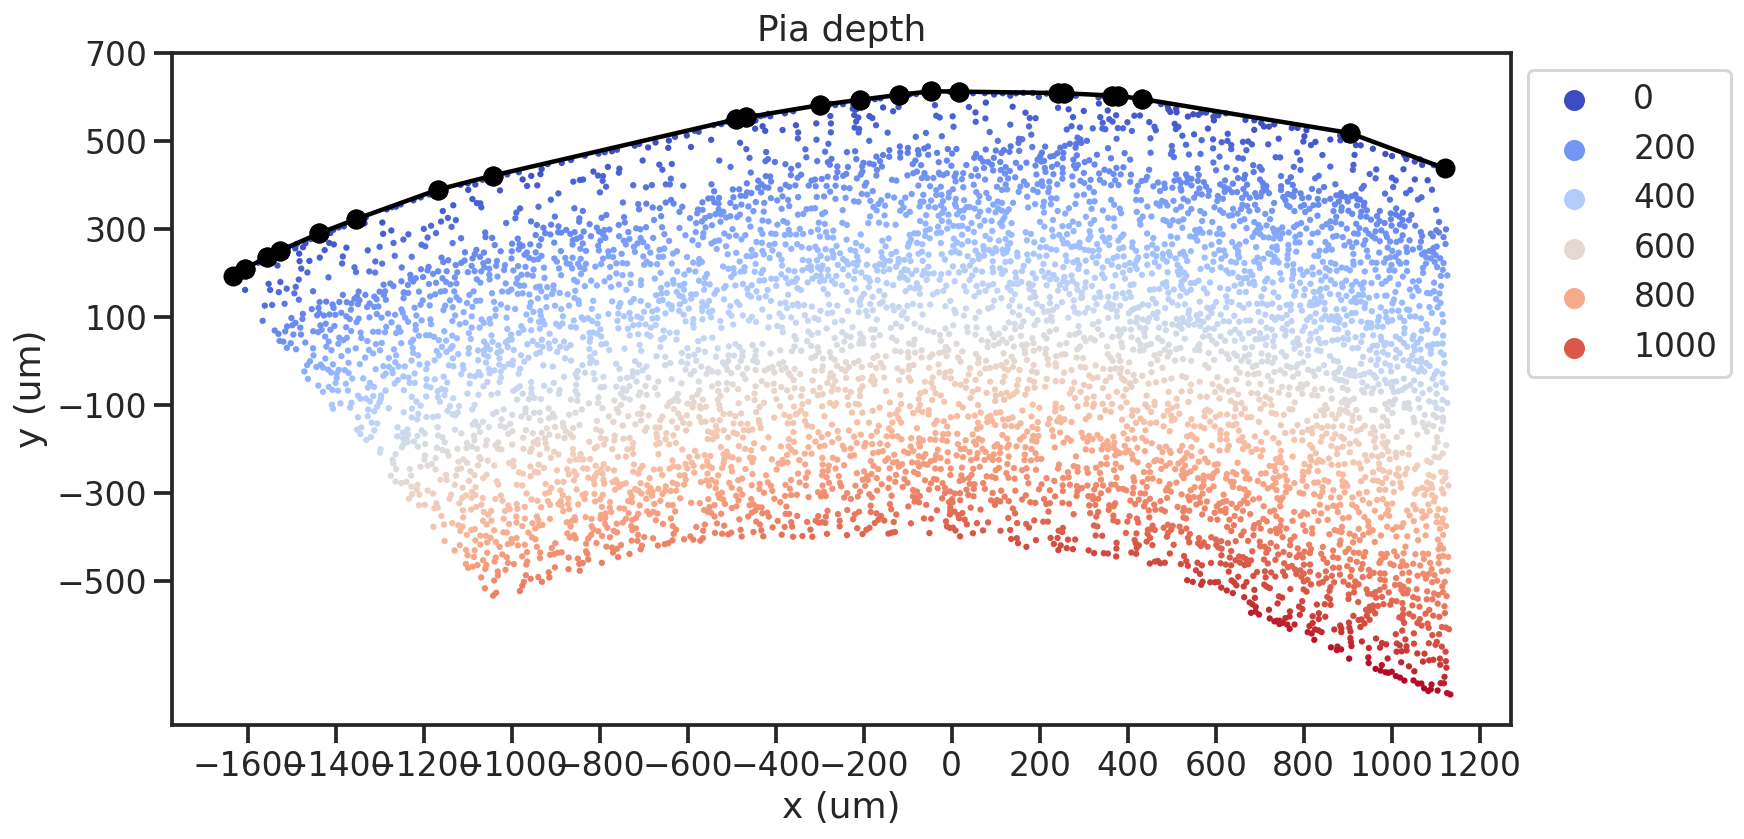

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
for i in range(len(pia_curve)-1):
    ax.plot(pia_curve[i:i+2, 0], 
            pia_curve[i:i+2, 1], 
            '-ok')
    
sns.scatterplot(data=metasub, x='x', y='y', hue='pia_depth', 
                # hue_order=hybrid_clsts, 
                # palette=palette,
                palette='coolwarm',
                s=10, edgecolor='none', ax=ax)
ax.grid(False)
ax.set_aspect('equal')
ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')
ax.set_title(f'Pia depth')
ax.set_xticks(np.arange(-1600, 1300, 200))
ax.set_yticks(np.arange(-500, 701, 200))
ax.legend(bbox_to_anchor=(1,1))

In [30]:
val = metasub['pia_depth'].values
pia_bins = np.linspace(np.min(val), np.max(val), 50)
metasub['pia_depth_bin'] = pd.cut(val, bins=pia_bins)

metasub_typecounts = metasub.groupby(['pia_depth_bin', 'cluster_hybrid']).size().unstack()
metasub_typefrac_perbin  = metasub_typecounts.divide(metasub_typecounts.sum(axis=1), axis=0)
metasub_typefrac_pertype = metasub_typecounts.divide(metasub_typecounts.sum(axis=0), axis=1)
metasub_totalcounts = metasub.groupby(['pia_depth_bin']).size()

In [31]:
cond = ((metasub['x']>0) & (metasub['x']<400))
metasub2 = metasub[cond].copy()

metasub2_typecounts = metasub2.groupby(['pia_depth_bin', 'cluster_hybrid']).size().unstack()
metasub2_typefrac_perbin  = metasub2_typecounts.divide(metasub2_typecounts.sum(axis=1), axis=0)
metasub2_typefrac_pertype = metasub2_typecounts.divide(metasub2_typecounts.sum(axis=0), axis=1)
metasub2_totalcounts = metasub2.groupby(['pia_depth_bin']).size()

Text(0, 0.5, 'Fraction of cells\n(each cell type sums to 1)')

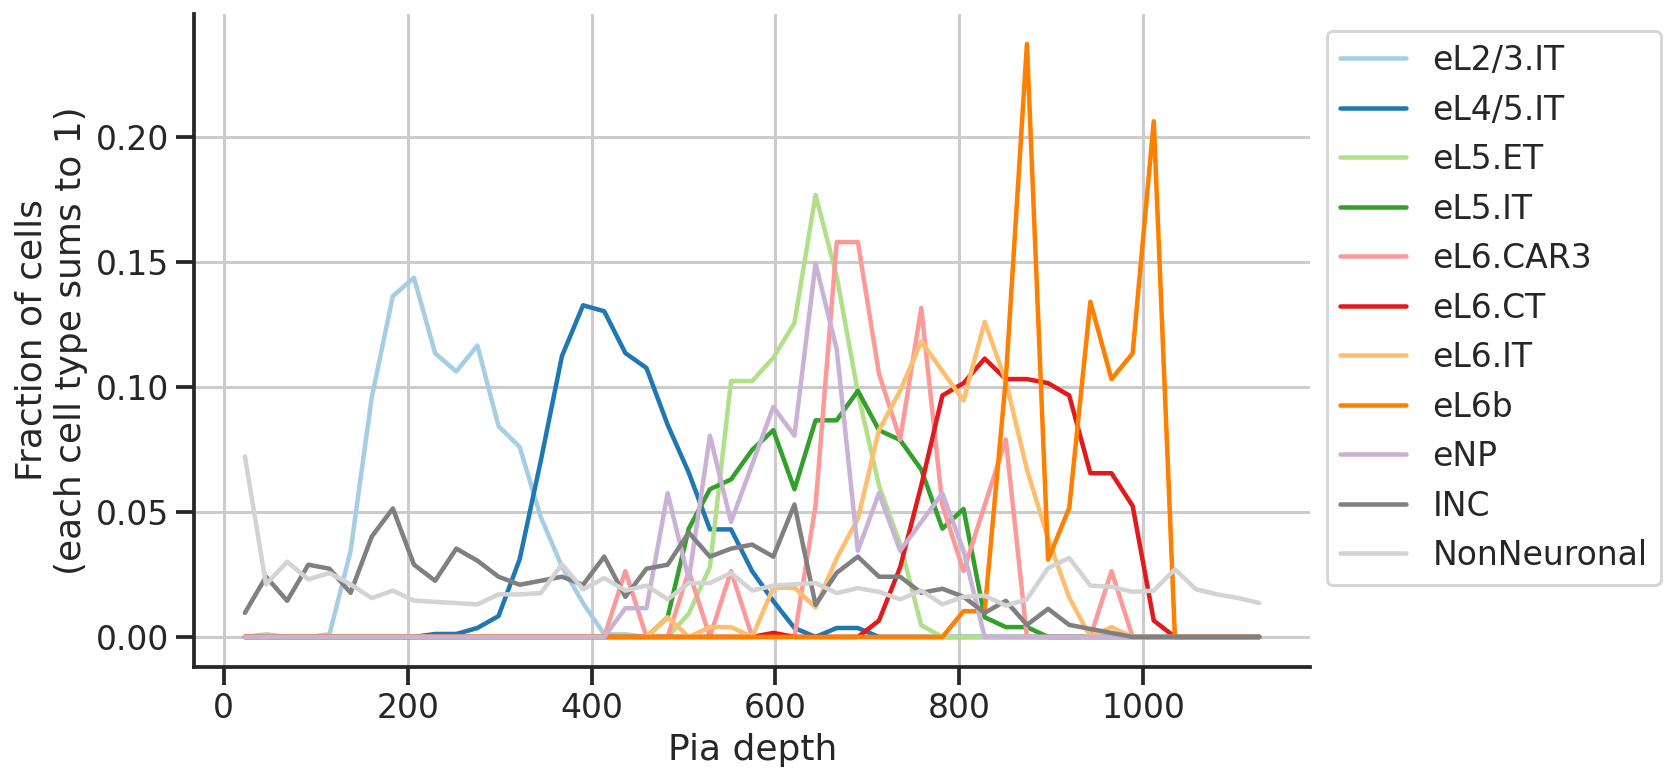

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
for col in hybrid_clsts: #metasub_typefrac_pertype: 
    ax.plot(pia_bins[1:], metasub_typefrac_pertype[col].values, label=col, color=palette[col])
ax.legend(bbox_to_anchor=(1,1))
sns.despine(ax=ax)
ax.set_xlabel('Pia depth')
ax.set_ylabel('Fraction of cells\n(each cell type sums to 1)')

Text(0, 0.5, 'Fraction of cells\n(each spatial location sums to 1)')

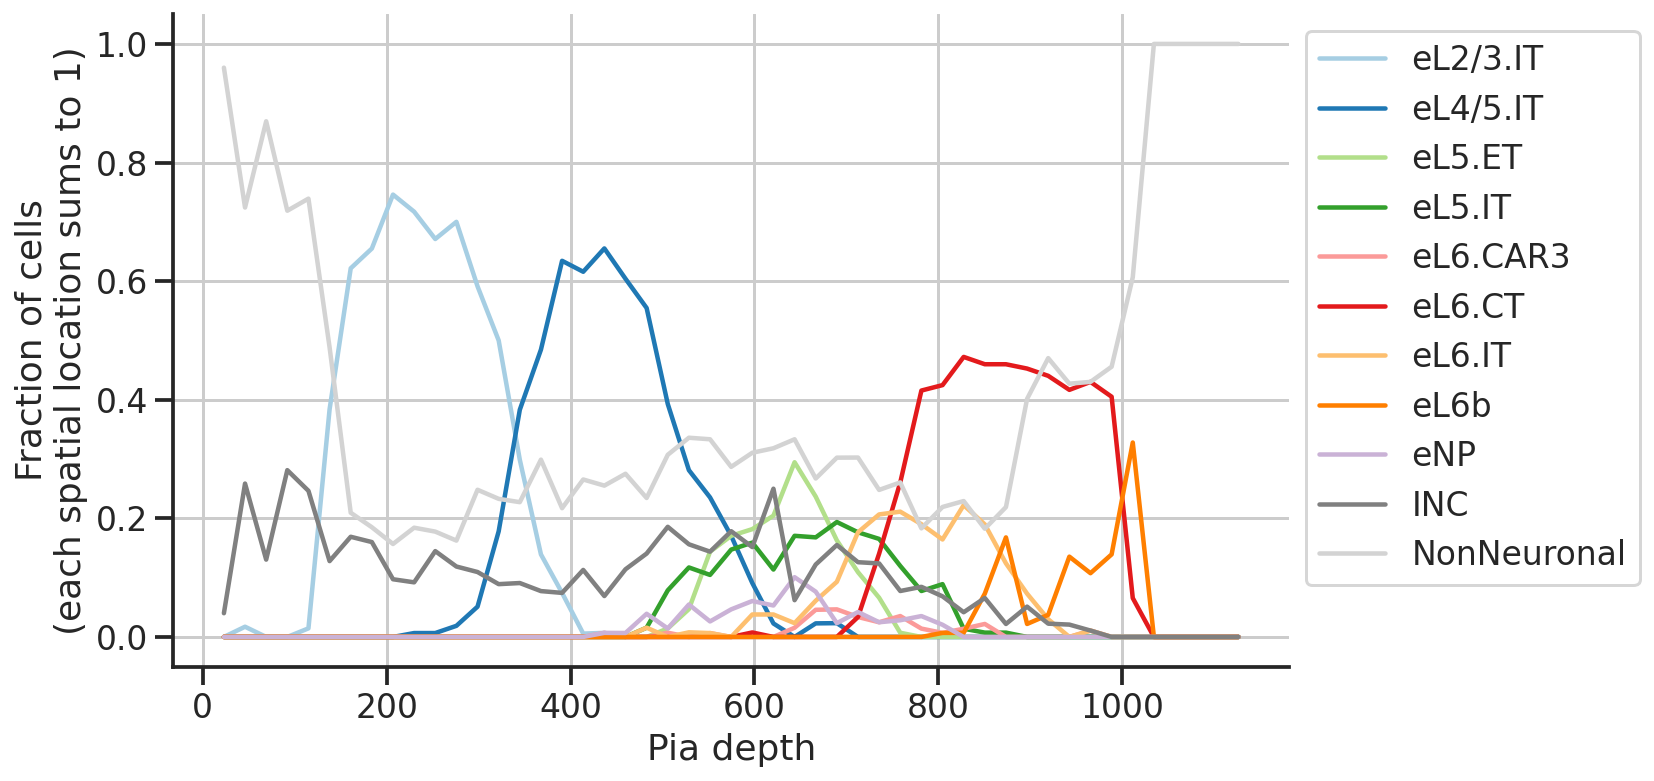

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
for col in hybrid_clsts: #metasub_typefrac_perbin: 
    ax.plot(pia_bins[1:], metasub_typefrac_perbin[col].values, label=col, color=palette[col])
ax.legend(bbox_to_anchor=(1,1))
sns.despine(ax=ax)
ax.set_xlabel('Pia depth')
ax.set_ylabel('Fraction of cells\n(each spatial location sums to 1)')

Text(0, 0.5, 'Fraction of cells')

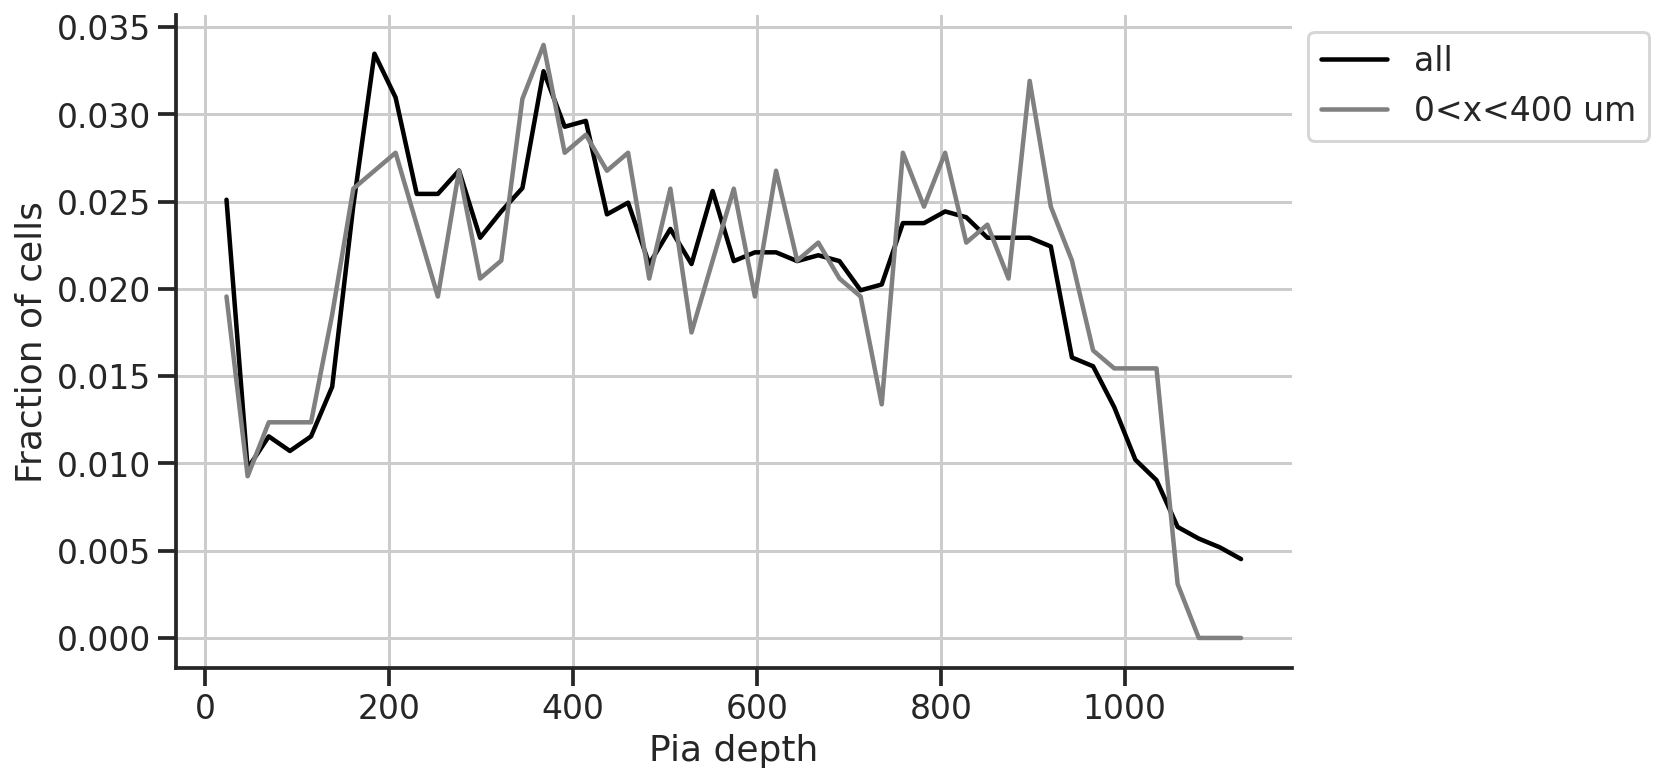

In [34]:

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(pia_bins[1:], metasub_totalcounts /metasub_totalcounts.sum() , '-k', label='all') #, label=col, color=palette[col])
ax.plot(pia_bins[1:], metasub2_totalcounts/metasub2_totalcounts.sum(), '-', color='gray', label='0<x<400 um', ) #, label=col, color=palette[col])
ax.legend(bbox_to_anchor=(1,1))
sns.despine(ax=ax)
ax.set_xlabel('Pia depth')
ax.set_ylabel('Fraction of cells')

Text(0, 0.5, 'Cell type composition\n per spatial location')

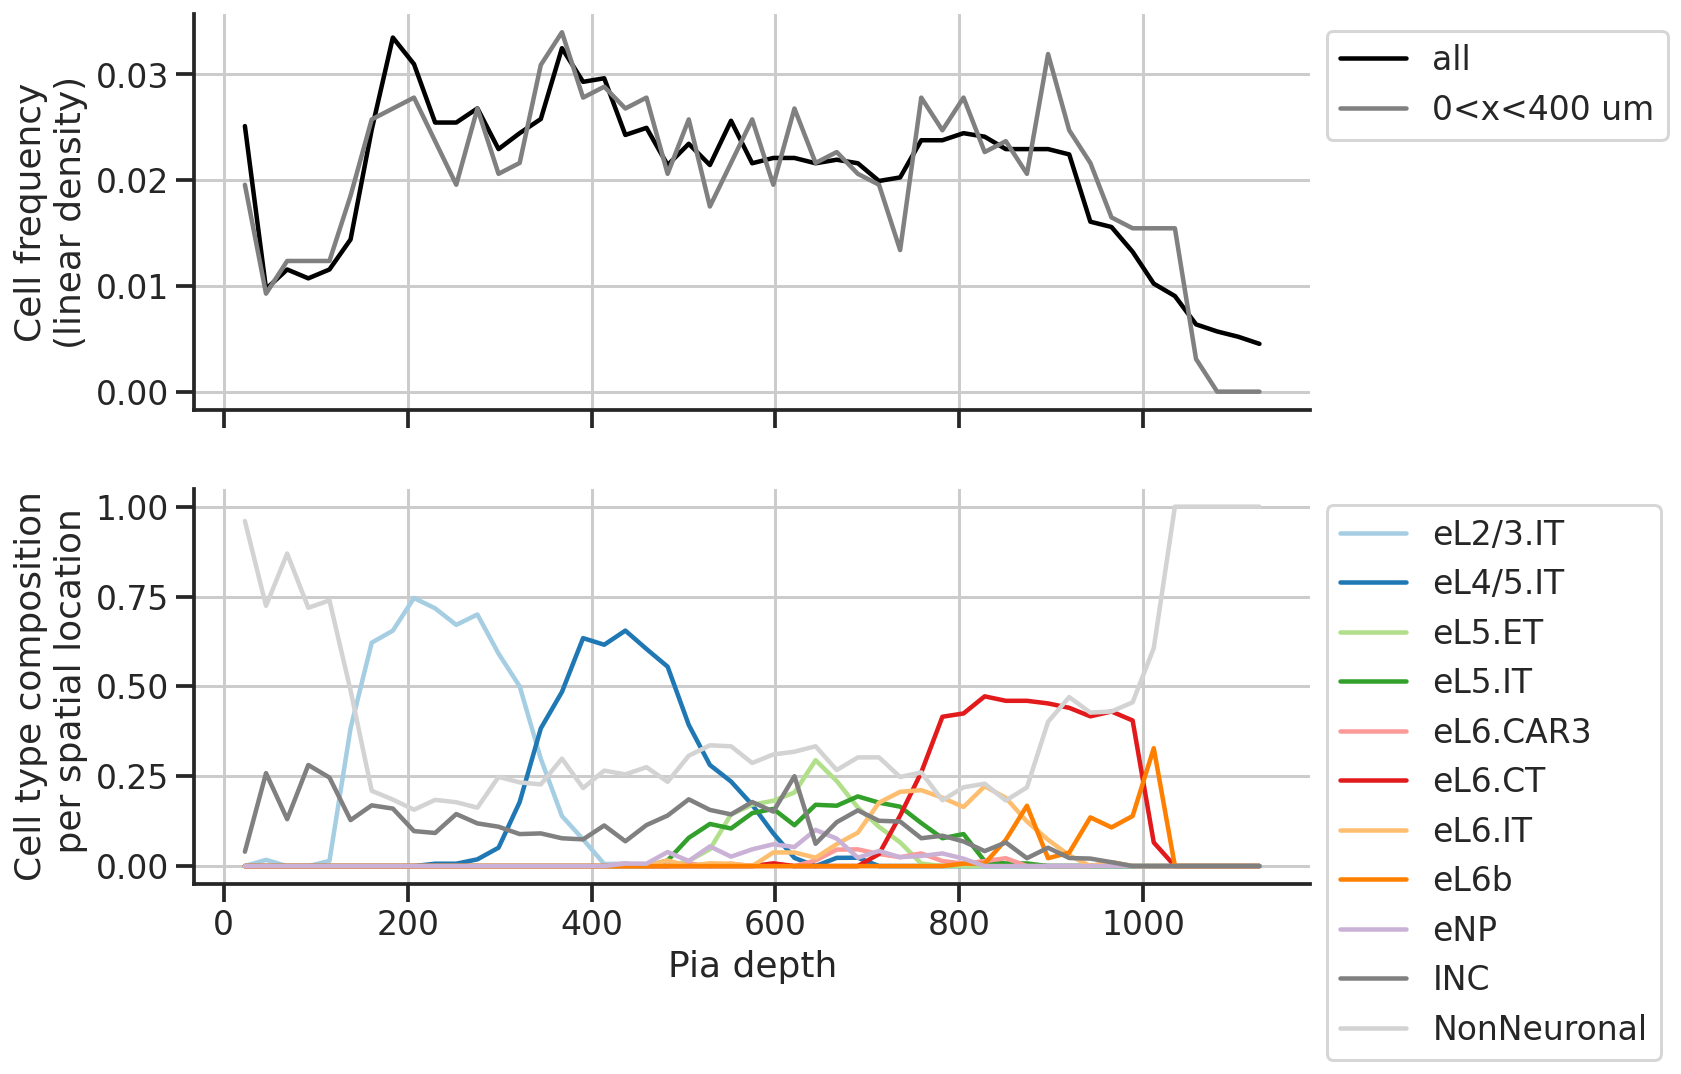

In [35]:
fig, axs = plt.subplots(2, 1, figsize=(10,4*2), sharex=True)
ax = axs[0]
ax.plot(pia_bins[1:], metasub_totalcounts /metasub_totalcounts.sum() , '-k', label='all') #, label=col, color=palette[col])
ax.plot(pia_bins[1:], metasub2_totalcounts/metasub2_totalcounts.sum(), '-', color='gray', label='0<x<400 um', ) #, label=col, color=palette[col])
ax.legend(bbox_to_anchor=(1,1))
sns.despine(ax=ax)
# ax.set_xlabel('Pia depth')
ax.set_ylabel('Cell frequency\n(linear density)')

ax = axs[1]
for col in hybrid_clsts: #metasub_typefrac_perbin: 
    ax.plot(pia_bins[1:], metasub_typefrac_perbin[col].values, label=col, color=palette[col])
ax.legend(bbox_to_anchor=(1,1))
sns.despine(ax=ax)
ax.set_xlabel('Pia depth')
ax.set_ylabel('Cell type composition\n per spatial location')

Text(0, 0.5, 'Cell type composition\n per spatial location')

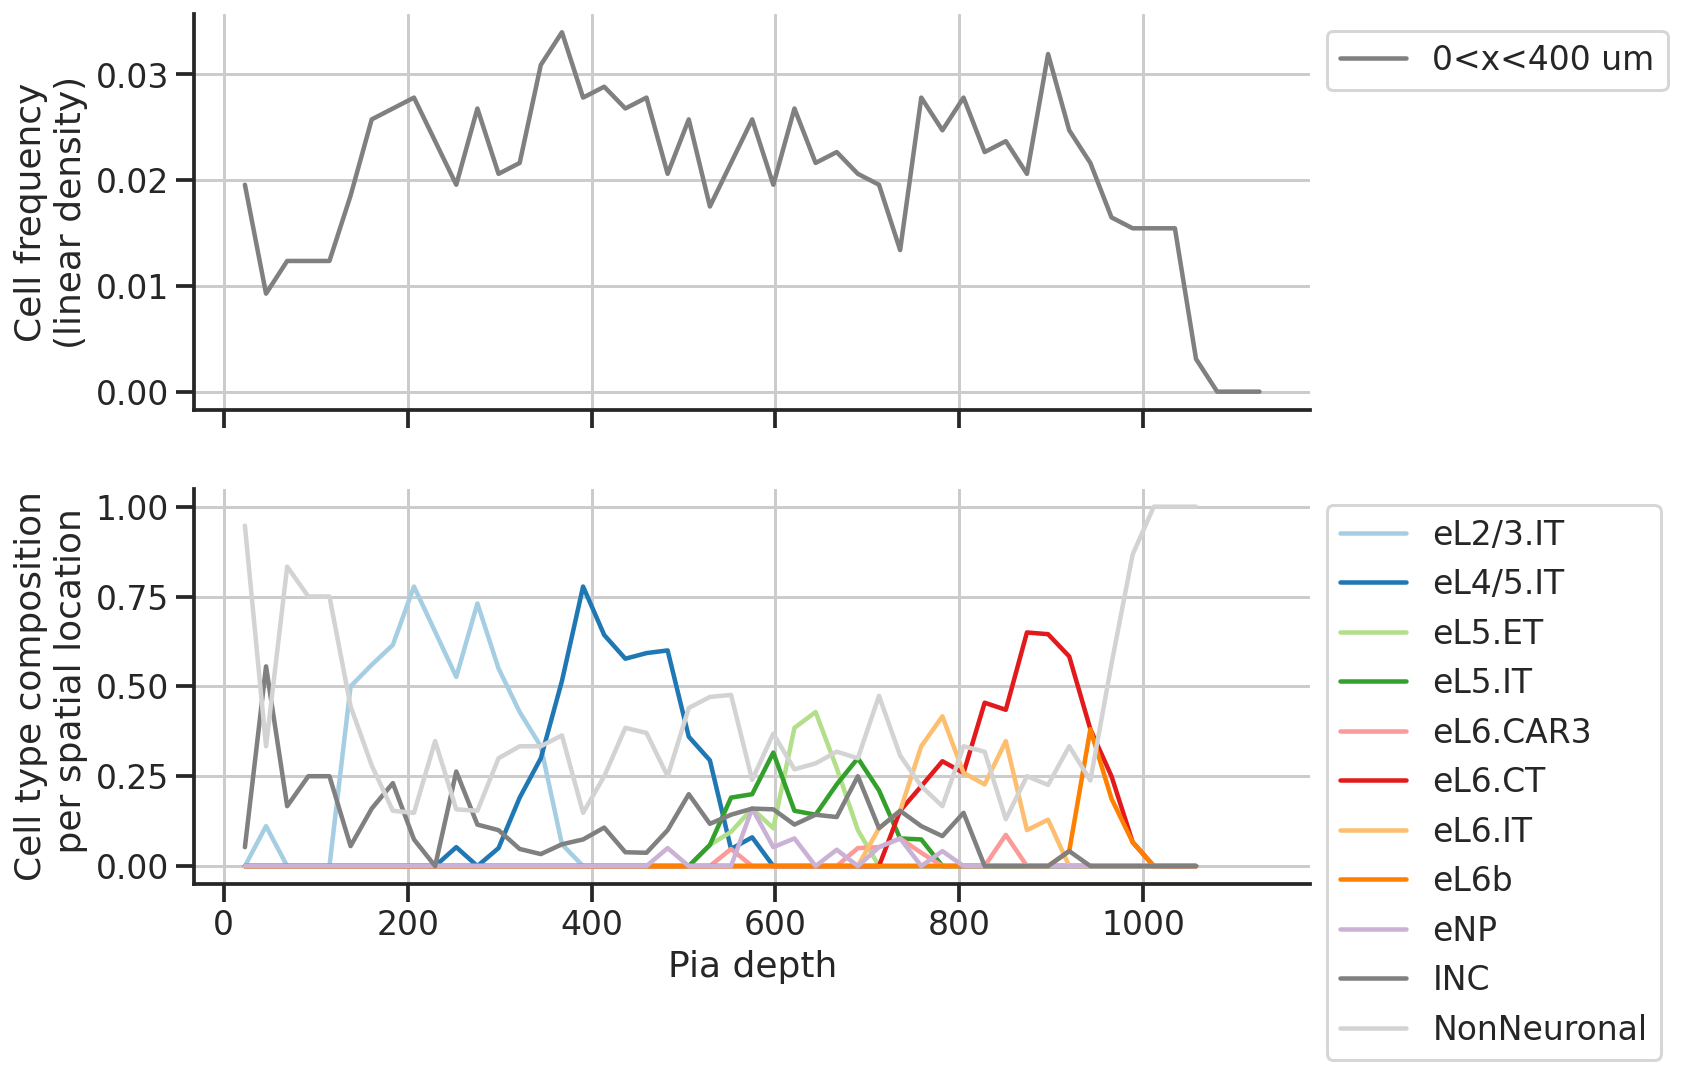

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(10,4*2), sharex=True)
ax = axs[0]
# ax.plot(pia_bins[1:], metasub_totalcounts /metasub_totalcounts.sum() , '-k', label='all') #, label=col, color=palette[col])
ax.plot(pia_bins[1:], metasub2_totalcounts/metasub2_totalcounts.sum(), '-', color='gray', label='0<x<400 um', ) #, label=col, color=palette[col])
ax.legend(bbox_to_anchor=(1,1))
sns.despine(ax=ax)
# ax.set_xlabel('Pia depth')
ax.set_ylabel('Cell frequency\n(linear density)')

ax = axs[1]
for col in hybrid_clsts: #metasub_typefrac_perbin: 
    ax.plot(pia_bins[1:], metasub2_typefrac_perbin[col].values, label=col, color=palette[col])
ax.legend(bbox_to_anchor=(1,1))
sns.despine(ax=ax)
ax.set_xlabel('Pia depth')
ax.set_ylabel('Cell type composition\n per spatial location')